# Mobile App Review Rating Predictor
## Scraping 140,000+ app reviews from the Google Play Store from 10 different categories

#### Required Imports

In [28]:
import pandas as pd
import seaborn as sns
from tqdm import tqdm
from google_play_scraper import Sort, reviews

### To have the model see various types of reviews, I take several apps from different categories
#### Mobile Application IDs from the Google Play Store

In [29]:
app_packages = [
  # Graphics & Design
  'com.canva.editor', #Canva
  'com.delgeo.desygner', #Desygner
  'com.brakefield.idfree', #Inifite Design
  'com.design.studio', #Design Studio
  'com.dephotos.crello', #Crello'
  'com.houzz.app', #Houzz
  'com.adobe.spark.post', #Adobe Spark Post
  'com.logopit.logoplus', #Logo Maker Plus

  # Entertainment
  'com.amazon.avod.thirdpartyclient', #Amazon Prime Video - Entertainment
  'com.netflix.mediaclient', #Netflix
  'com.disney.datg.videoplatforms.android.watchdc', #Disney
  'com.hbo.hbonow', #HBO Max
  'com.mtvn.mtvPrimeAndroid', #MTV
  'com.hulu.plus', #HULU
  'com.cbs.app', #Paramount
  'com.nick.android.nickjr', #Nick. Jr.
  'com.cw.fullepisodes.android', #The CW
  'com.rhythmnewmedia.tmz', #TMZ
  'com.kiloo.subwaysurf', #Subway Surfers

  #Photo & Videos
  'com.adobe.psmobile', #Adobe Photoshop
  'com.niksoftware.snapseed', #Snapseed
  'com.adobe.lrmobile', #Adobe Lightroom
  'photo.editor.photoeditor.photoeditorpro', #Photo Editor Pro
  'com.picsart.studio', #Picsart
  'vsin.t16_funny_photo', #Photo Lab Picture Editor
  'photo.editor.photoeditor.filtersforpictures', #Photo Editor

  #Travel
  'com.tripadvisor.tripadvisor', #Tripadvisor
  'com.expedia.bookings', #Expedia
  'com.booking', #Booking
  'ctrip.english', #Trip.com
  'com.trivago', #Trivago
  'com.kayak.android', #Kayak
  'com.airbnb.android', #Airbnb
  'com.couchsurfing.mobile.android', #Couchsurfing

  #Finance
  'com.yahoo.mobile.client.android.finance', #Yahoo Finance - Finance
  'com.bloomberg.android.plus', #Bloomberg
  'com.fusionmedia.investing', #Investing.com
  'com.mint', #Mint
  'com.bookmark.money', #Money Lover
  'com.microsoft.amp.apps.bingfinance', #MSN Money

  #Health & Fitness
  'com.huawei.health', #Huawei Health
  'com.sec.android.app.shealth', #Samsung Health
  'com.google.android.apps.fitness', #Google Fit
  'com.fitbit.FitbitMobile', #Fitbit
  'com.myfitnesspal.android', #Calorie Counter
  'homeworkout.homeworkouts.noequipment', #Home Workout

  #Music
  'com.google.android.apps.youtube.music', #Youtube Music
  'com.spotify.music', #Spotify
  'com.apple.android.music', #Apple Music
  'com.soundcloud.android', #SoundCloud
  'com.amazon.mp3', #Amazon Music
  'com.musixmatch.android.lyrify', #Musixmatch
  'deezer.android.app', #Deezer
  'com.shazam.android', #Shazam

  #Productivity
  'cc.forestapp', #Forest
  'com.ticktick.task', #TickTick
  'com.monday.monday', #Monday
  'co.thefabulous.app', #Fabulous
  'com.superelement.pomodoro', #Focus To-Do
  'com.microsoft.todos', #Microsoft To Do
  'com.todoist', #Todoist
  'com.google.android.calendar', #Google Calendar
  'com.sillens.shapeupclub', #Lifesum - Lifestyle 

  #Social Networking
  'com.twitter.android', #Twitter
  'com.snapchat.android', #Snapchat
  'com.instagram.android', #Instagram

  #Unclassified
  'com.nianticlabs.pokemongo', #Pokemon Go - Games
  'com.nordvpn.android', #NordVPN - Utilities
  'org.khanacademy.android', #Khan Academy - Education
  'com.google.android.apps.magazines', #Google News - News
  'com.handmark.sportcaster', #CBS Sport - Sport
  'com.accuweather.android', #Accuweather - Weather
  'com.lydia' #Lydia Wire Transfers - Banking
]

#### Loop retrieving reviews from Google Play mobile app previously picked

In [15]:
app_reviews = []
for ap in tqdm(app_packages):
  for score in [1,2,3,4,5]:
    for sort_order in [Sort.MOST_RELEVANT, Sort.NEWEST]:
      rvs, _ = reviews(
        ap,
        lang='en',
        country='us',
        sort=sort_order,
        count= 200,
        filter_score_with=score
      )
      for r in rvs:
        r['sortOrder'] = 'most_relevant' if sort_order == Sort.MOST_RELEVANT else 'newest'
        r['appId'] = ap
      app_reviews.extend(rvs)

100%|██████████| 73/73 [11:55<00:00,  9.81s/it]


#### There are exactly 141462 reviews scraped from the Google Play Store

In [22]:
len(app_reviews)

141462

#### Distribution of reviews according to their score is approximately equal

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='score', ylabel='count'>

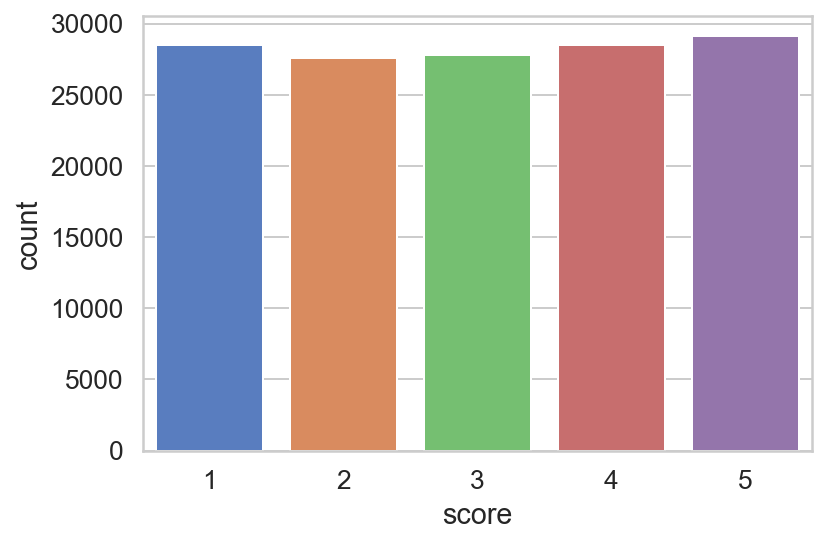

In [25]:
import seaborn as sns
sns.countplot(app_reviews_df.score)

#### Converting to DataFrame and exporting it

In [23]:
app_reviews_df = pd.DataFrame(app_reviews)

In [27]:
app_reviews_df.to_csv('reviews.csv')

#### Next Step: Making a predictive model with CountVectorizer and Naive Bayes Technique (model.py)